In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from sklearn import datasets
import datetime
import seaborn as sns
%matplotlib notebook

In [42]:
Ca_counties_vax_demo_csv = "covid19vaccinesbycountybydemographic.csv"

ca_counties_vaxdemo_df = pd.read_csv(Ca_counties_vax_demo_csv, encoding="utf-8")
ca_counties_vaxdemo_df['administered_date']=pd.to_datetime(ca_counties_vaxdemo_df['administered_date'])
ca_counties_vaxdemo_df.head(50)


,county,county_type,demographic_category,demographic_value,est_population,est_age_16plus_pop,administered_date,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,cumulative_unvax_total_pop,cumulative_unvax_16plus_pop,suppress_data
0,Alameda,MIXED,Age Group,0-17,367870.0,40855.0,2021-04-26,276.0,12830.0,64.0,2949.0,276.0,15779.0,352091.0,25076.0,False
1,Alameda,MIXED,Age Group,0-17,367870.0,40855.0,2021-04-25,361.0,12618.0,41.0,2885.0,361.0,15503.0,352367.0,25352.0,False
2,Alameda,MIXED,Age Group,0-17,367870.0,40855.0,2021-04-24,738.0,12298.0,127.0,2844.0,738.0,15142.0,352728.0,25713.0,False
3,Alameda,MIXED,Age Group,0-17,367870.0,40855.0,2021-04-23,814.0,11687.0,165.0,2717.0,814.0,14404.0,353466.0,26451.0,False
4,Alameda,MIXED,Age Group,0-17,367870.0,40855.0,2021-04-22,708.0,11038.0,202.0,2552.0,708.0,13590.0,354280.0,27265.0,False
5,Alameda,MIXED,Age Group,0-17,367870.0,40855.0,2021-04-21,810.0,10532.0,148.0,2350.0,810.0,12882.0,354988.0,27973.0,False
6,Alameda,MIXED,Age Group,0-17,367870.0,40855.0,2021-04-20,769.0,9870.0,91.0,2202.0,769.0,12072.0,355798.0,28783.0,False
7,Alameda,MIXED,Age Group,0-17,367870.0,40855.0,2021-04-19,564.0,9192.0,84.0,2111.0,564.0,11303.0,356567.0,29552.0,False
8,Alameda,MIXED,Age Group,0-17,367870.0,40855.0,2021-04-18,595.0,8712.0,45.0,2027.0,595.0,10739.0,357131.0,30116.0,False
9,Alameda,MIXED,Age Group,0-17,367870.0,40855.0,2021-04-17,1077.0,8162.0,155.0,1982.0,1078.0,10144.0,357726.0,30711.0,False


In [43]:
ca_counties_vaxdemo_df = ca_counties_vaxdemo_df.sort_values(["county", "administered_date"], ascending = (True, True))
ca_counties_vaxdemo_df.head(50)

,county,county_type,demographic_category,demographic_value,est_population,est_age_16plus_pop,administered_date,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,cumulative_unvax_total_pop,cumulative_unvax_16plus_pop,suppress_data
132,Alameda,MIXED,Age Group,0-17,367870.0,40855.0,2020-12-15,0.0,0.0,0.0,0.0,0.0,0.0,367870.0,40855.0,False
265,Alameda,MIXED,Age Group,18-49,709483.0,709483.0,2020-12-15,28.0,28.0,0.0,0.0,28.0,28.0,709455.0,709455.0,False
398,Alameda,MIXED,Age Group,50-64,315856.0,315856.0,2020-12-15,6.0,6.0,0.0,0.0,6.0,6.0,315850.0,315850.0,False
531,Alameda,MIXED,Age Group,65+,285108.0,285108.0,2020-12-15,2.0,2.0,0.0,0.0,2.0,2.0,285106.0,285106.0,False
664,Alameda,MIXED,Race/Ethnicity,American Indian or Alaska Native,4920.0,3962.0,2020-12-15,0.0,0.0,0.0,0.0,0.0,0.0,4920.0,3962.0,False
797,Alameda,MIXED,Race/Ethnicity,Asian,442174.0,356076.0,2020-12-15,19.0,19.0,0.0,0.0,19.0,19.0,442155.0,356057.0,False
930,Alameda,MIXED,Race/Ethnicity,Black or African American,192344.0,154905.0,2020-12-15,2.0,2.0,0.0,0.0,2.0,2.0,192342.0,154903.0,False
1063,Alameda,MIXED,Race/Ethnicity,Latino,392847.0,316225.0,2020-12-15,7.0,7.0,0.0,0.0,7.0,7.0,392840.0,316218.0,False
1196,Alameda,MIXED,Race/Ethnicity,Multiracial,71371.0,57467.0,2020-12-15,0.0,0.0,0.0,0.0,0.0,0.0,71371.0,57467.0,False
1329,Alameda,MIXED,Race/Ethnicity,Native Hawaiian or Other Pacific Islander,13475.0,10848.0,2020-12-15,0.0,0.0,0.0,0.0,0.0,0.0,13475.0,10848.0,False


In [44]:
county2 = input("County name? ")
county = ca_counties_vaxdemo_df.loc[ca_counties_vaxdemo_df["county"]==county2]
county
demo = county.loc[ca_counties_vaxdemo_df["demographic_value"]== "American Indian or Alaska Native"]
demo.head(100)


County name? Alameda


,county,county_type,demographic_category,demographic_value,est_population,est_age_16plus_pop,administered_date,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,cumulative_unvax_total_pop,cumulative_unvax_16plus_pop,suppress_data
664,Alameda,MIXED,Race/Ethnicity,American Indian or Alaska Native,4920.0,3962.0,2020-12-15,0.0,0.0,0.0,0.0,0.0,0.0,4920.0,3962.0,False
663,Alameda,MIXED,Race/Ethnicity,American Indian or Alaska Native,4920.0,3962.0,2020-12-16,1.0,1.0,0.0,0.0,1.0,1.0,4919.0,3961.0,False
662,Alameda,MIXED,Race/Ethnicity,American Indian or Alaska Native,4920.0,3962.0,2020-12-17,1.0,2.0,0.0,0.0,1.0,2.0,4918.0,3960.0,False
661,Alameda,MIXED,Race/Ethnicity,American Indian or Alaska Native,4920.0,3962.0,2020-12-18,4.0,6.0,0.0,0.0,4.0,6.0,4914.0,3956.0,False
660,Alameda,MIXED,Race/Ethnicity,American Indian or Alaska Native,4920.0,3962.0,2020-12-19,3.0,9.0,0.0,0.0,3.0,9.0,4911.0,3953.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,Alameda,MIXED,Race/Ethnicity,American Indian or Alaska Native,4920.0,3962.0,2021-03-20,13.0,646.0,27.0,747.0,16.0,1393.0,3527.0,2569.0,False
568,Alameda,MIXED,Race/Ethnicity,American Indian or Alaska Native,4920.0,3962.0,2021-03-21,18.0,648.0,16.0,763.0,18.0,1411.0,3509.0,2551.0,False
567,Alameda,MIXED,Race/Ethnicity,American Indian or Alaska Native,4920.0,3962.0,2021-03-22,36.0,667.0,17.0,780.0,36.0,1447.0,3473.0,2515.0,False
566,Alameda,MIXED,Race/Ethnicity,American Indian or Alaska Native,4920.0,3962.0,2021-03-23,26.0,666.0,29.0,809.0,28.0,1475.0,3445.0,2487.0,False


In [45]:
xaxis = np.arange (1.0, 134.0, 1)

cases_plot = demo.plot('administered_date', 'cumulative_at_least_one_dose',kind="scatter")
plt.title(f"Total number of American Indian or Alaska Native individuals vaccinated in {county2}")
plt.xlabel("Date")
plt.ylabel("Number of vaccinations")

x_values = xaxis
y_values = demo['cumulative_at_least_one_dose']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


line_eq



<IPython.core.display.Javascript object>

'y = 21.48x + -508.04'

<IPython.core.display.Javascript object>


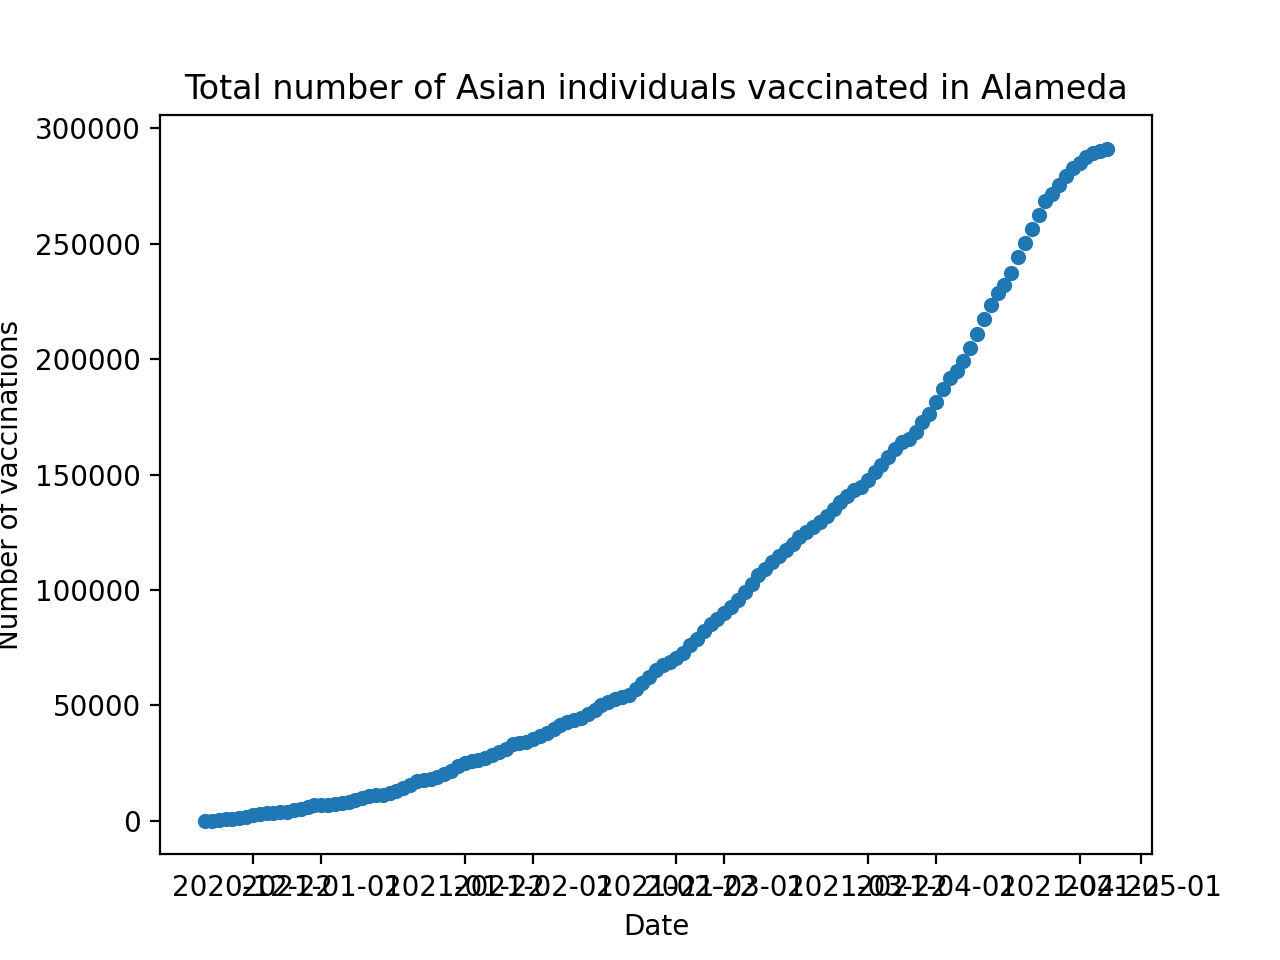

y = 2206.06x + -52352.36
The vaccination rate of the Asian demographic in Alameda county is about 2206.063761846951 people per day
{0.8}


In [53]:
demo = county.loc[ca_counties_vaxdemo_df["demographic_value"]== "Asian"]
xaxis = np.arange (1.0, 134.0, 1)

cases_plot = demo.plot('administered_date', 'cumulative_at_least_one_dose',kind="scatter")
plt.title(f"Total number of Asian individuals vaccinated in {county2}")
plt.xlabel("Date")
plt.ylabel("Number of vaccinations")

x_values = xaxis
y_values = demo['cumulative_at_least_one_dose']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


print (line_eq)
print (f"The vaccination rate of the Asian demographic in {county2} county is about {slope} people per day")
#a = demo.iloc[0, 4]
#b = ({slope} / {a})

#print ({b})

In [ ]:
demo = county.loc[ca_counties_vaxdemo_df["demographic_value"]== "Black or African American"]
xaxis = np.arange (1.0, 134.0, 1)

cases_plot = demo.plot('administered_date', 'cumulative_at_least_one_dose',kind="scatter")
plt.title(f"Total number of Black or African American individuals vaccinated in {county2}")
plt.xlabel("Date")
plt.ylabel("Number of vaccinations")

x_values = xaxis
y_values = demo['cumulative_at_least_one_dose']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


print (line_eq)
print (f"The vaccination rate of the Black or African American demographic in {county2} county is about {slope} people per day")

In [ ]:
demo = county.loc[ca_counties_vaxdemo_df["demographic_value"]== "Latino"]
xaxis = np.arange (1.0, 134.0, 1)

cases_plot = demo.plot('administered_date', 'cumulative_at_least_one_dose',kind="scatter")
plt.title(f"Total number of Latino individuals vaccinated in {county2}")
plt.xlabel("Date")
plt.ylabel("Number of vaccinations")

x_values = xaxis
y_values = demo['cumulative_at_least_one_dose']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


print (line_eq)
print (f"The vaccination rate of the Latino demographic in {county2} county is about {slope} people per day")

In [ ]:
demo = county.loc[ca_counties_vaxdemo_df["demographic_value"]== "Multiracial"]
xaxis = np.arange (1.0, 134.0, 1)

cases_plot = demo.plot('administered_date', 'cumulative_at_least_one_dose',kind="scatter")
plt.title(f"Total number of Multiracial individuals vaccinated in {county2}")
plt.xlabel("Date")
plt.ylabel("Number of vaccinations")

x_values = xaxis
y_values = demo['cumulative_at_least_one_dose']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


print (line_eq)
print (f"The vaccination rate of the Multiracial demographic in {county2} county is about {slope} people per day")

In [ ]:
demo = county.loc[ca_counties_vaxdemo_df["demographic_value"]== "Native Hawaiian or Other Pacific Islander"]
xaxis = np.arange (1.0, 134.0, 1)

cases_plot = demo.plot('administered_date', 'cumulative_at_least_one_dose',kind="scatter")
plt.title(f"Total number of Native Hawaiian or Other Pacific Islander individuals vaccinated in {county2}")
plt.xlabel("Date")
plt.ylabel("Number of vaccinations")

x_values = xaxis
y_values = demo['cumulative_at_least_one_dose']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


print (line_eq)
print (f"The vaccination rate of the Native Hawaiian or Other Pacific Islander demographic in {county2} county is about {slope} people per day")

In [ ]:
demo = county.loc[ca_counties_vaxdemo_df["demographic_value"]== "Other Race"]
xaxis = np.arange (1.0, 134.0, 1)

cases_plot = demo.plot('administered_date', 'cumulative_at_least_one_dose',kind="scatter")
plt.title(f"Total number of Other Race individuals vaccinated in {county2}")
plt.xlabel("Date")
plt.ylabel("Number of vaccinations")

x_values = xaxis
y_values = demo['cumulative_at_least_one_dose']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


print (line_eq)
print (f"The vaccination rate of the 'Other Race' demographic in {county2} county is about {slope} people per day")

In [ ]:
demo = county.loc[ca_counties_vaxdemo_df["demographic_value"]== "White"]
xaxis = np.arange (1.0, 134.0, 1)

cases_plot = demo.plot('administered_date', 'cumulative_at_least_one_dose',kind="scatter")
plt.title(f"Total number of White individuals vaccinated in {county2}")
plt.xlabel("Date")
plt.ylabel("Number of vaccinations")

x_values = xaxis
y_values = demo['cumulative_at_least_one_dose']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


print (line_eq)
print (f"The vaccination rate of the White demographic in {county2} county is about {slope} people per day")

In [ ]:
#a = demo.iloc[0, 4]
#b = a.loc["est_population"]
#b = {slope}/(a.["est_population"])
print (a)
